# Detailed Multi-Scale Biophysical Neuron Models

Detailed Multi-Scale Biophysical Neuron Models represent the highest level of biological realism in computational neuroscience. Unlike extended Hodgkin-Huxley compartmental models which typically feature simplified morphologies and a limited set of conductances, these models incorporate complete morphological reconstructions with thousands of compartments, diverse channel subtypes with complex kinetics, subcellular signaling cascades, and molecular-level processes. These models attempt to bridge scales from molecular interactions to whole-cell behavior, integrating data from molecular dynamics, protein structure, single-channel recordings, and detailed anatomical reconstructions.

## Key Properties

1. **Full Morphological Detail**: Incorporates complete dendritic and axonal arbors based on actual neuronal reconstructions
2. **Subcellular Compartmentalization**: Models distinct regions like spines, boutons, axon initial segment, nodes of Ranvier
3. **Diverse Channel Subtypes**: Includes dozens of specific ion channel types with location-dependent densities
4. **Channel Modulation**: Captures state-dependent channel modulation by second messengers and phosphorylation
5. **Calcium Dynamics**: Detailed calcium buffering, diffusion, and calcium-dependent processes
6. **Molecular Signaling**: Incorporates signaling cascades and biochemical reaction networks
7. **Receptor Trafficking**: Models receptor insertion, internalization, and lateral diffusion
8. **Stochastic Processes**: Accounts for channel noise and probabilistic transmitter release
9. **Energy Constraints**: Considers metabolic costs and energy-dependent processes
10. **Development and Plasticity**: Can incorporate mechanisms for structural and functional changes over time

## Mathematical Description

The model combines multiple mathematical frameworks across scales:

For membrane potential in each compartment i:
Cm,i(dVi/dt) = -∑Iion,i - ∑Isyn,i + ∑Iaxial,i,j + Iext,i

For each ion channel type k in compartment i:
Iion,k,i = gk,i·mk^a·hk^b·(Vi - Ek)

For channel gating variables:
dmk/dt = αm(V)(1-mk) - βm(V)mk or dmk/dt = (mk,∞(V) - mk)/τm(V)

For calcium dynamics in compartment i and domain d:
d[Ca2+]i,d/dt = -f·Ica,i,d/(2·F·vol_i,d) - ∑Rbuffer - Jpump + Jdiff

For synaptic transmission:
Isyn,i = gsyn·s·(Vi - Esyn)
ds/dt = α·[T]·(1-s) - β·s

For biochemical signaling:
d[X]/dt = ∑production_rates - ∑degradation_rates + Jdiffusion

Parameters (subset):
- Anatomical parameters: Compartment dimensions, connectivity, spine densities
- Membrane properties: Specific capacitance, axial resistivity, membrane resistivity
- Channel properties: Maximum conductances, activation/inactivation parameters, ion selectivity
- Calcium handling: Buffer concentrations and kinetics, pump rates, diffusion coefficients
- Synaptic properties: Receptor types, kinetics, densities, release probabilities
- Signaling molecules: Enzyme kinetics, protein concentrations, reaction rates
- Metabolic factors: ATP availability, energy coupling coefficients

State Variables (per compartment):
- Membrane potential (V)
- Channel gating variables (m, h, etc. for each channel type)
- Ion concentrations ([Na+], [K+], [Ca2+], etc.)
- Receptor states
- Protein phosphorylation states
- Enzyme activation states
- Metabolite concentrations

## Algorithm

1. Initialize model
   - Load morphological reconstruction
   - Assign compartment properties
   - Set initial conditions for all state variables
   - Define channel distributions and properties
   - Configure simulation parameters

2. Spatial discretization
   - Divide neuron into compartments based on the d_lambda rule or fixed intervals
   - Create connection matrices for axial currents
   - Identify special compartments (soma, AIS, spines, synapses)

3. For each time step from t=0 to t=tmax:
   
   a. For each compartment i:
      - Calculate ion channel currents:
        • Update all channel gating variables
        • Compute current for each channel type
        • Sum all ionic currents
      
      - Calculate synaptic currents:
        • Update synaptic state variables
        • Compute current for each synapse
      
      - Calculate axial currents:
        • Compute current between adjacent compartments

      - Calculate membrane potential:
        • Sum all currents
        • Update membrane potential using numerical integration

      - Update ion concentrations:
        • Calculate ion fluxes
        • Update intracellular and extracellular concentrations
        • Update reversal potentials
      
      - Update molecular signaling:
        • Solve reaction-diffusion systems
        • Update protein states and concentrations
        • Apply feedback to channel and receptor properties

   b. Handle spike generation and propagation:
      - Detect threshold crossings
      - Trigger action potentials in axonal compartments
      - Propagate signals to downstream compartments
   
   c. Apply adaptive time stepping if needed:
      - Adjust dt based on system dynamics
      - Use finer time steps for fast processes

   d. Store variables for analysis:
      - Record potentials, currents, concentrations at selected sites
   
   e. Increment time: t = t + dt

4. Analyze and visualize results
   - Generate multi-scale visualizations
   - Analyze electrical and chemical signaling patterns
   - Compute derived measures (firing rates, dendritic integration properties, etc.)
   - Compare with experimental data

## Characteristic Behaviors

1. **Precise Spike Timing**: Reproduces neuron-specific action potential waveforms and timing
2. **Dendritic Computation**: Captures nonlinear integration of inputs and dendritic spikes
3. **Frequency Preference**: Exhibits resonance properties based on channel composition
4. **Cell-Type Specificity**: Reproduces behaviors characteristic of specific neuron types
5. **Activity-Dependent Modulation**: Shows adaptation, facilitation, fatigue across multiple timescales
6. **State-Dependent Processing**: Exhibits different computational modes based on neuromodulatory state
7. **Differential Compartment Activation**: Displays selective activation of dendritic branches
8. **Metaplasticity**: Demonstrates history-dependent plasticity rules
9. **Pathological Conditions**: Can simulate disease states and channelopathies
10. **Stimulus Selectivity**: Shows preference for specific input patterns at different dendritic locations

## Biological Mechanisms Represented

The model represents numerous biological mechanisms including:
- Complete ion channel biophysics with state-dependent kinetics
- Calcium-dependent signaling cascades and gene expression
- Receptor trafficking and membrane insertion dynamics
- Cytoskeletal changes and morphological plasticity
- Energy metabolism and mitochondrial function
- Protein synthesis and degradation
- Retrograde messengers and trans-synaptic signaling
- Neurotransmitter recycling and depletion
- Glial interactions and extracellular homeostasis
- Neuromodulatory effects on multiple timescales

## Applications

Detailed multi-scale models are particularly useful for:
- Linking genetic mutations to altered neuronal function
- Predicting effects of drugs on specific neuron types
- Understanding information processing in complex dendritic trees
- Developing hypotheses about subcellular mechanisms
- Interpreting results from advanced imaging techniques
- Testing theories of neural computation
- Investigating disease mechanisms at molecular and cellular levels
- Predicting emergent network phenomena from cell properties
- Connecting molecular-level processes to systems-level behavior
- Guiding experimental design for multi-scale investigations
- Developing personalized treatments for neurological disorders

Using NEURON version: NEURON -- VERSION 8.2.6-1-gb6e6a5fad+ build-osx-wheels-script (b6e6a5fad+) 2024-07-25
Changed dt


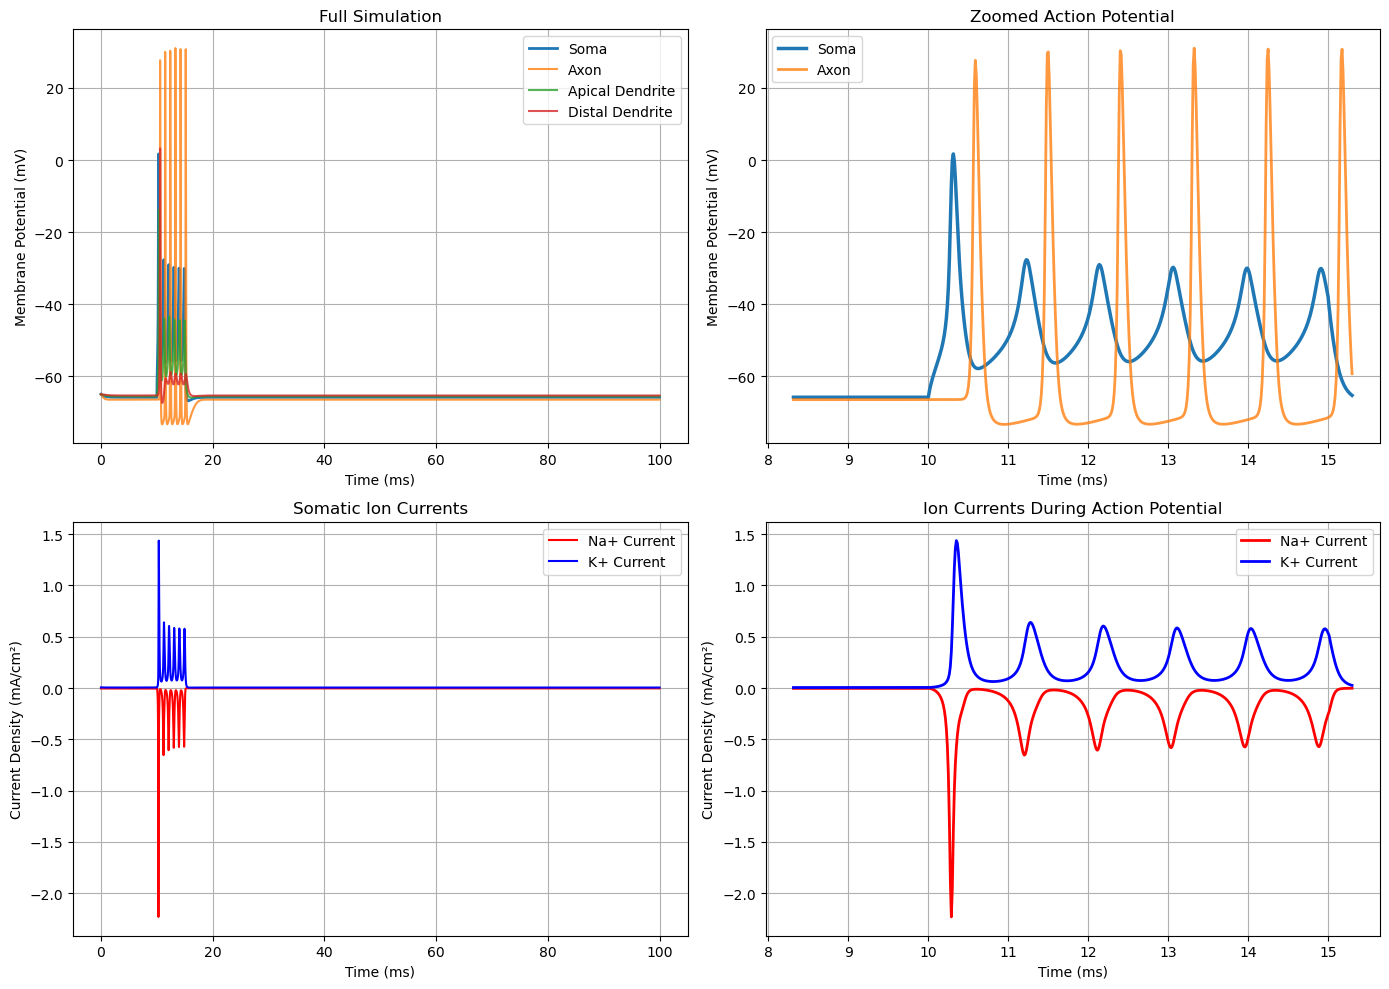

In [15]:
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt

class DetailedNeuronModel:
    def __init__(self, simulation_time=100):
        """
        Create a detailed multi-compartmental pyramidal neuron
        with realistic biophysics using built-in NEURON mechanisms.
        """
        h.load_file('stdrun.hoc')  # Load standard NEURON run library
        h.celsius = 37             # Set temperature to 37°C
        
        # Store simulation parameters
        self.simulation_time = simulation_time  # ms
        
        # Create cell sections (compartments)
        self.create_morphology()
        
        # Add biophysical mechanisms (ion channels)
        self.add_biophysics()
        
        # Set up recording
        self.setup_recording()
        
    def create_morphology(self):
        """Create a morphology with soma, axon, and dendritic tree"""
        # Create soma
        self.soma = h.Section(name='soma')
        self.soma.L = 20    # Length in μm
        self.soma.diam = 20 # Diameter in μm
        self.soma.nseg = 1  # Single segment
        
        # Create axon (multiple compartments for propagation)
        self.axon = h.Section(name='axon')
        self.axon.L = 800
        self.axon.diam = 1
        self.axon.nseg = 100  # More segments for detailed propagation
        self.axon.connect(self.soma(0.5)) # Connect to middle of soma
        
        # Create primary apical dendrite
        self.apical = h.Section(name='apical')
        self.apical.L = 200
        self.apical.diam = 3.0
        self.apical.nseg = 20
        self.apical.connect(self.soma(1.0)) # Connect to end of soma
        
        # Create apical tuft (branching dendrites)
        self.tuft = []
        for i in range(5):  # Create 5 tuft branches
            tuft = h.Section(name=f'tuft[{i}]')
            tuft.L = 150
            tuft.diam = 1.5
            tuft.nseg = 15
            tuft.connect(self.apical(1.0))
            self.tuft.append(tuft)
            
        # Create basal dendrites
        self.basal = []
        for i in range(4):  # Create 4 basal dendrites
            basal = h.Section(name=f'basal[{i}]')
            basal.L = 150
            basal.diam = 2.0
            basal.nseg = 15
            basal.connect(self.soma(0.0))
            self.basal.append(basal)
            
        # Create list of all sections for easy iteration
        self.all_sections = [self.soma, self.axon, self.apical]
        self.all_sections.extend(self.tuft)
        self.all_sections.extend(self.basal)
    
    def add_biophysics(self):
        """Add biophysics to different compartments using built-in mechanisms"""
        # Add passive properties to all sections
        for sec in self.all_sections:
            sec.Ra = 100    # Axial resistance (Ω·cm)
            sec.cm = 1      # Membrane capacitance (μF/cm²)
            
            # Insert passive leak channel
            sec.insert('pas')
            sec.g_pas = 0.0001  # Conductance (S/cm²)
            sec.e_pas = -70     # Reversal potential (mV)
        
        # SOMA: Add Hodgkin-Huxley channels for active properties - FURTHER INCREASED CONDUCTANCES
        self.soma.insert('hh')       
        self.soma.gnabar_hh = 0.4    # Na+ conductance - FURTHER INCREASED
        self.soma.gkbar_hh = 0.05    # K+ conductance - INCREASED
        self.soma.gl_hh = 0.0003     # Leak conductance
        self.soma.el_hh = -70        # Leak reversal potential
        
        # AXON: Higher Na+ channel density for action potential generation
        self.axon.insert('hh')
        self.axon.gnabar_hh = 0.7    # Higher Na+ conductance - FURTHER INCREASED 
        self.axon.gkbar_hh = 0.1     # K+ conductance
        
        # DENDRITES: Add HH channels with different densities
        for sec in [self.apical] + self.tuft + self.basal:
            # Add Hodgkin-Huxley channels with lower density
            sec.insert('hh')
            sec.gnabar_hh = 0.2      # Lower Na+ conductance in dendrites - INCREASED
            sec.gkbar_hh = 0.04      # Lower K+ conductance in dendrites - INCREASED
    
    def setup_recording(self):
        """Set up recording vectors for voltages and currents"""
        # Time vector
        self.time_vec = h.Vector()
        self.time_vec.record(h._ref_t)
        
        # Voltage recordings from different compartments
        self.soma_v = h.Vector()
        self.soma_v.record(self.soma(0.5)._ref_v)
        
        self.axon_v = h.Vector()
        self.axon_v.record(self.axon(0.5)._ref_v)
        
        self.apical_v = h.Vector()
        self.apical_v.record(self.apical(0.5)._ref_v)
        
        # Record a distal dendritic voltage if tuft exists
        if self.tuft:
            self.distal_v = h.Vector()
            self.distal_v.record(self.tuft[0](0.9)._ref_v)
        
        # Na+ and K+ currents
        self.soma_ina = h.Vector()
        self.soma_ik = h.Vector()
        self.soma_ina.record(self.soma(0.5)._ref_ina)
        self.soma_ik.record(self.soma(0.5)._ref_ik)
    
    def add_stimulus(self, delay=10, duration=5, amplitude=3.0):
        """Add current injection to the soma - INCREASED AMPLITUDE, LONGER DURATION"""
        self.stim = h.IClamp(self.soma(0.5))
        self.stim.delay = delay    # ms
        self.stim.dur = duration   # ms - LONGER DURATION
        self.stim.amp = amplitude  # nA - FURTHER INCREASED
    
    def add_synaptic_input(self, section, position, start_time, weight=0.1):
        """Add a synaptic input to a specific location - INCREASED WEIGHT"""
        # Create a synapse using the built-in ExpSyn
        syn = h.ExpSyn(section(position))
        syn.tau = 2  # ms - synaptic time constant
        syn.e = 0    # mV - reversal potential (excitatory)
        
        # Create a NetStim to drive the synapse
        stim = h.NetStim()
        stim.number = 1    # number of spikes
        stim.start = start_time  # ms
        
        # Connect the NetStim to the synapse
        nc = h.NetCon(stim, syn)
        nc.weight[0] = weight  # synaptic weight - FURTHER INCREASED
        
        return stim, syn, nc
    
    def simulate(self):
        """Run the simulation"""
        h.finitialize(-70)  # Initialize voltage to -70 mV
        h.tstop = self.simulation_time
        h.dt = 0.01  # Integration time step (ms)
        h.run()
        
        # Convert recorded vectors to numpy arrays
        self.t = np.array(self.time_vec)
        self.v_soma = np.array(self.soma_v)
        self.v_axon = np.array(self.axon_v)
        self.v_apical = np.array(self.apical_v)
        
        if hasattr(self, 'distal_v'):
            self.v_distal = np.array(self.distal_v)
            
        self.ina_soma = np.array(self.soma_ina)
        self.ik_soma = np.array(self.soma_ik)
    
    def plot_results(self):
        """Plot the simulation results with enhanced visualization"""
        plt.figure(figsize=(14, 10))
        
        # Full simulation voltage traces
        plt.subplot(2, 2, 1)
        plt.plot(self.t, self.v_soma, label='Soma', linewidth=2)
        plt.plot(self.t, self.v_axon, label='Axon', alpha=0.8)
        plt.plot(self.t, self.v_apical, label='Apical Dendrite', alpha=0.8)
        
        if hasattr(self, 'v_distal'):
            plt.plot(self.t, self.v_distal, label='Distal Dendrite', alpha=0.8)
            
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')
        plt.title('Full Simulation')
        plt.legend()
        plt.grid(True)
        
        # Zoomed in on spike
        plt.subplot(2, 2, 2)
        # Find time indices around the spike (assuming it happens after the stimulus)
        spike_idx = np.argmax(self.v_soma[int(10/h.dt):int(30/h.dt)]) + int(10/h.dt)
        start_idx = max(0, spike_idx - int(2/h.dt))  # 2ms before spike
        end_idx = min(len(self.t), spike_idx + int(5/h.dt))  # 5ms after spike
        
        plt.plot(self.t[start_idx:end_idx], self.v_soma[start_idx:end_idx], 
                 label='Soma', linewidth=2.5)
        plt.plot(self.t[start_idx:end_idx], self.v_axon[start_idx:end_idx], 
                 label='Axon', alpha=0.8, linewidth=2)
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')
        plt.title('Zoomed Action Potential')
        plt.legend()
        plt.grid(True)
        
        # Ion currents - Full view
        plt.subplot(2, 2, 3)
        plt.plot(self.t, self.ina_soma, label='Na+ Current', color='red')
        plt.plot(self.t, self.ik_soma, label='K+ Current', color='blue')
        plt.xlabel('Time (ms)')
        plt.ylabel('Current Density (mA/cm²)')
        plt.title('Somatic Ion Currents')
        plt.legend()
        plt.grid(True)
        
        # Ion currents - Zoomed view around spike
        plt.subplot(2, 2, 4)
        plt.plot(self.t[start_idx:end_idx], self.ina_soma[start_idx:end_idx], 
                 label='Na+ Current', color='red', linewidth=2)
        plt.plot(self.t[start_idx:end_idx], self.ik_soma[start_idx:end_idx], 
                 label='K+ Current', color='blue', linewidth=2)
        plt.xlabel('Time (ms)')
        plt.ylabel('Current Density (mA/cm²)')
        plt.title('Ion Currents During Action Potential')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()
        
    def visualize_morphology(self):
        """Create a 3D visualization of the neuron morphology"""
        try:
            import neuron.gui
            s = h.Shape()
            s.show(0)
        except:
            print("3D visualization not available in this environment")

    def generate_multiple_spikes(self, delay=10, duration=50, amplitude=2.5):
        """Generate a train of spikes with longer stimulation"""
        self.stim = h.IClamp(self.soma(0.5))
        self.stim.delay = delay    # ms
        self.stim.dur = duration   # ms - MUCH LONGER for multiple spikes
        self.stim.amp = amplitude  # nA


# Usage example
if __name__ == "__main__":
    # First make sure NEURON is correctly installed
    print(f"Using NEURON version: {h.nrnversion()}")
    
    # Create a detailed neuron model
    neuron_model = DetailedNeuronModel(simulation_time=100)
    
    # Choose either single spike or multiple spikes
    # Option 1: Single strong spike
    neuron_model.add_stimulus(delay=10, duration=5, amplitude=3.0)
    
    # Option 2: Multiple spikes (uncomment to use)
    # neuron_model.generate_multiple_spikes(delay=10, duration=50, amplitude=2.5)
    
    # Add a synaptic input to an apical dendrite
    neuron_model.add_synaptic_input(neuron_model.apical, 0.7, start_time=40, weight=0.1)
    
    # Run simulation
    neuron_model.simulate()
    
    # Plot results
    neuron_model.plot_results()
    
    # Visualize morphology (if in a GUI environment)
    neuron_model.visualize_morphology()